In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from io import StringIO

# Principal Component Analysis

In machine learning and data science, Principal Component Analysis (PCA) is a method of analysing datasets to obtain an orthogonal basis that best captures most of the variance of our data.  It is often used to remove extra features or dimensions in large-dimensional datasets, because in a similar vein to SVD, PCA will give us a set of axes with both large contributions and small contributions to our data.

## Example 1: Breast cancer dataset

Importing the data set for characteristics of tumor cells (this is the same dataset used for the MP)

In [2]:
params = ["radius", "texture", "perimeter", "area",
          "smoothness", "compactness", "concavity",
          "concave points", "symmetry", "fractal dimension"];
stats = ["(mean)", "(stderr)", "(worst)"]
labels = ["patient ID", "Malignant/Benign"]

for p in params:
    for s in stats:
        labels.append(p + " " + s)

tumor_data = pd.io.parsers.read_csv("breast-cancer-train.dat",header=None,names=labels)

In [3]:
tumor_data

,patient ID,Malignant/Benign,radius (mean),radius (stderr),radius (worst),texture (mean),texture (stderr),texture (worst),perimeter (mean),perimeter (stderr),...,concavity (worst),concave points (mean),concave points (stderr),concave points (worst),symmetry (mean),symmetry (stderr),symmetry (worst),fractal dimension (mean),fractal dimension (stderr),fractal dimension (worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,891923,B,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,...,14.67,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794
296,891936,B,10.91,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,...,11.37,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643
297,892189,M,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915
298,892214,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676


### 1) Creating a smaller subset of points:
Selecting a subset of the data for better visualization and understanding of the method. We will start with six patients and only two of the features:

In [4]:
new_data = pd.DataFrame(tumor_data[["Malignant/Benign", 'smoothness (mean)', 'radius (mean)']][272:278])
new_data

,Malignant/Benign,smoothness (mean),radius (mean)
272,M,8.867,21.750
273,B,1.750,9.742
274,M,2.765,17.930
275,B,4.021,11.890
276,B,1.565,11.330
277,M,2.363,18.810


C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


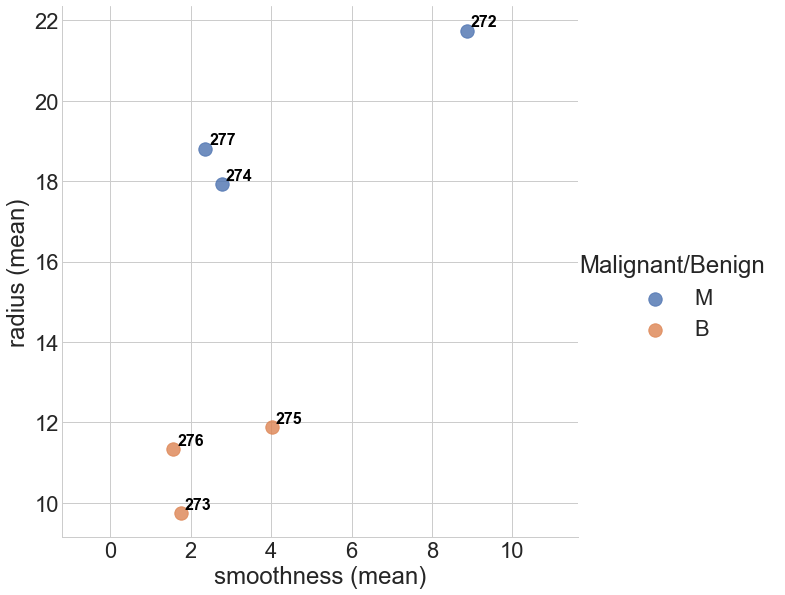

In [5]:
g1 = sns.lmplot('smoothness (mean)', 'radius (mean)', new_data,  hue="Malignant/Benign", scatter_kws={"s": 180}, fit_reg=False, height=8)
ax = g1.axes[0,0]
ax.axis('equal')

# This code snippet is plotting the labels
for i in range(272,278):
    x = new_data['smoothness (mean)'][i] + 0.1
    y = new_data['radius (mean)'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)

### 2) Shift the dataset to center the data:
The first step is to determine the "center" of the dataset (the mean value of each feature):

In [6]:
mean_smooth = new_data['smoothness (mean)'].mean()
mean_radius = new_data['radius (mean)'].mean()

print(mean_smooth,mean_radius)

print(new_data['smoothness (mean)'].std(),new_data['radius (mean)'].std())

3.555166666666667 15.241999999999999
2.7458182326342486 4.8805671801543715


C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


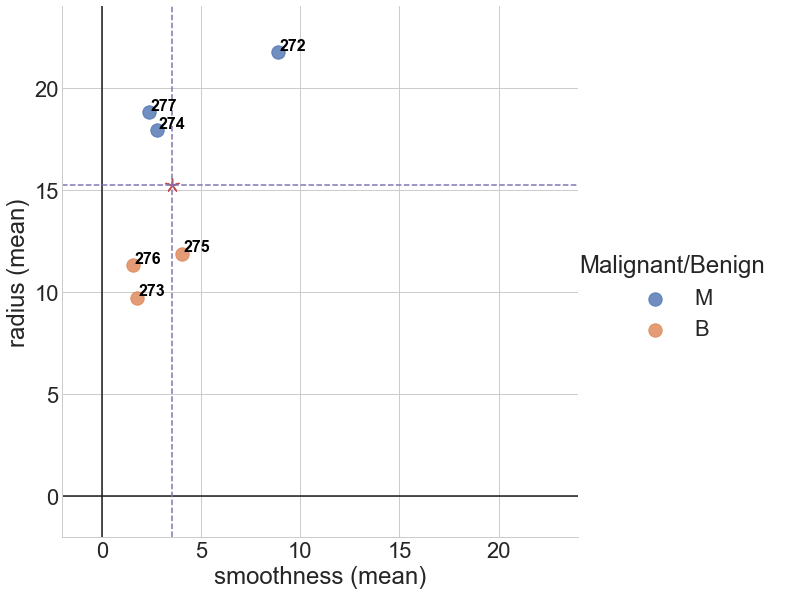

In [7]:
g1 = sns.lmplot('smoothness (mean)', 'radius (mean)', new_data,  hue="Malignant/Benign", scatter_kws={"s": 180}, fit_reg=False, height=8)
ax = g1.axes[0,0]
plt.xlim(-2,24)
plt.ylim(-2,24)
for i in range(272,278):
    x = new_data['smoothness (mean)'][i] + 0.1
    y = new_data['radius (mean)'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)
        
ax.scatter(mean_smooth,mean_radius,  s=180, c='r', marker=(5, 2))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axhline(y=mean_radius, color='m',linestyle='--')
ax.axvline(x=mean_smooth, color='m',linestyle='--')

And then we "center" the dataset, such that each feature has zero mean

In [8]:
new_data['smoothness (zero mean)'] = new_data['smoothness (mean)'] - new_data['smoothness (mean)'].mean()
new_data['radius (zero mean)'] = new_data['radius (mean)'] - new_data['radius (mean)'].mean()

print(new_data['smoothness (zero mean)'].mean())
print(new_data['radius (zero mean)'].mean())

-1.4802973661668753e-16
8.881784197001252e-16


In [9]:
new_data['smoothness (zero mean)']

272    5.311833
273   -1.805167
274   -0.790167
275    0.465833
276   -1.990167
277   -1.192167
Name: smoothness (zero mean), dtype: float64

Plot the centered data:

C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


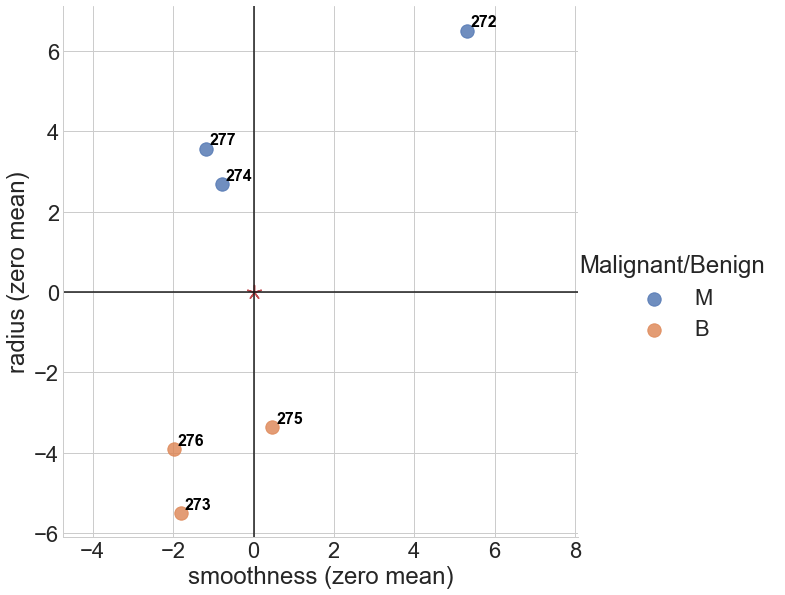

In [10]:
g1 = sns.lmplot('smoothness (zero mean)', 'radius (zero mean)', new_data, hue="Malignant/Benign", scatter_kws={"s": 180}, fit_reg=False, height=8)
ax = g1.axes[0,0]
ax.axis('equal')

for i in range(272,278):
    x = new_data['smoothness (zero mean)'][i] + 0.1
    y = new_data['radius (zero mean)'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)

ax.scatter(0,0,  s=200, c='r', marker=(5, 2))

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

### 3) Get covariance matrix

PCA wants to find the directions of maximum variance. For that, we will need to first define the covariance matrix:

$ M $: total number of data points

$ N $ : number of features

$Cov({\bf A}) = \frac{1}{M-1} {\bf A}^T {\bf A} $

In [11]:
# centered data
A = new_data[['smoothness (zero mean)', 'radius (zero mean)']]
A

,smoothness (zero mean),radius (zero mean)
272,5.311833,6.508
273,-1.805167,-5.500
274,-0.790167,2.688
275,0.465833,-3.352
276,-1.990167,-3.912
277,-1.192167,3.568


In [12]:
M,N = A.shape

In [13]:
# Using the definition
cov_matrix = (1/(M-1))*A.T@A
print(cov_matrix)

                        smoothness (zero mean)  radius (zero mean)
smoothness (zero mean)                7.539518            8.868854
radius (zero mean)                    8.868854           23.819936


In [14]:
# Or using python built-in function
A.cov()

,smoothness (zero mean),radius (zero mean)
smoothness (zero mean),7.539518,8.868854
radius (zero mean),8.868854,23.819936


The variances are on the diagonal (co-variance of a variable with itself), and the sum of the 2 values is the overall variability:

In [15]:
np.diag(cov_matrix).sum()

31.359453766666668

In [16]:
7.53951/31.35945

0.24042226505885786

PCA replaces the original variables with new variables, called principal components, which are orthogonal (i.e. they have zero covariations) and have variances in decreasing order. To accomplish this, we will use the diagonalization of the covariance matrix:

In [17]:
l,u = la.eig(cov_matrix)
print(l)
print(u)

[ 3.6414725  27.71798127]
[[-0.91547669 -0.40237101]
 [ 0.40237101 -0.91547669]]


$$cov({\bf A}) = \begin{bmatrix} -0.40237101 & -0.91547669 \\ -0.91547669 &  0.40237101 \end{bmatrix} \begin{bmatrix} 27.71798127 & 0 \\ 0 &  3.6414725  \end{bmatrix} \begin{bmatrix} -0.40237101 & -0.91547669 \\ -0.91547669 &  0.40237101 \end{bmatrix}^T$$

In [18]:
27.717981/31.3594537

0.8838795874814619

Note that the diagonal sum is still 31.359, which says that the two components account for all the variability.


PCA finds, in the data space, the dimension (direction) with the largest variance out of the overall variance.


In this example, if we reduce the dimension space to include only one variable, the first principal component 27.718, accounts for 88% of the variability

Hence, the largest eigenvalue of the covariance matrix corresponds to the largest variance of the dataset, and the associated eigenvector is the direction of maximum variance. For our example:

C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


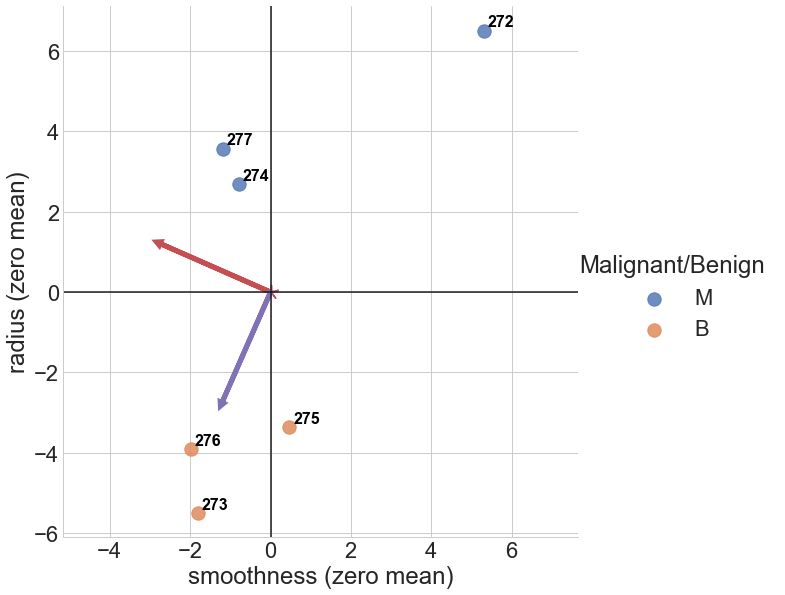

In [19]:
g1 = sns.lmplot('smoothness (zero mean)', 'radius (zero mean)', new_data, hue="Malignant/Benign", scatter_kws={"s": 180}, fit_reg=False, height=8)
ax = g1.axes[0,0]
ax.axis('equal')

for i in range(272,278):
    x = new_data['smoothness (zero mean)'][i] + 0.1
    y = new_data['radius (zero mean)'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)

ax.scatter(0,0,  s=200, c='r', marker=(5, 2))

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

s = 3

J = 0 # choice of principal direction
x = u[0,J]
y = u[1,J]
ax.arrow(0,0,s*x,s*y,color='black',head_width=0.1, head_length=0.1, fc='r', ec='r', lw=5)

J = 1 # choice of principal direction
x = u[0,J]
y = u[1,J]
ax.arrow(0,0,s*x,s*y,color='black',head_width=0.1, head_length=0.1, fc='m', ec='m', lw=5)

### 4) Singular value decomposition

We know that the eigenvectors of ${\bf A}^T{\bf A}$ are the right singular vectors of ${\bf A}$, or the columns of ${\bf V}$ from the SVD decomposition of ${\bf A}$ (or the rows of V transpose). 

Hence, instead of having to calculate the covariance matrix and solve an eigenvalue problem, we will instead get the reduced form of the SVD!

In [20]:
A

,smoothness (zero mean),radius (zero mean)
272,5.311833,6.508
273,-1.805167,-5.500
274,-0.790167,2.688
275,0.465833,-3.352
276,-1.990167,-3.912
277,-1.192167,3.568


In [21]:
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# variances = eig(covariance) = singular values squared
variances = S**2

print(variances)

# principal directions
pc1_vec = Vt[0,:]
pc2_vec = Vt[1,:]

[138.58990634  18.20736249]


Note that we don't need to worry about the constant value from the covariance matrix that we are disregarding. The variance values change, but their proportionality remains:

In [22]:
variances[0]/variances.sum()

0.8838795941635329

### 5) Plotting the principal directions using the singular right vectors

C:\Users\LOTLOUISCHO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


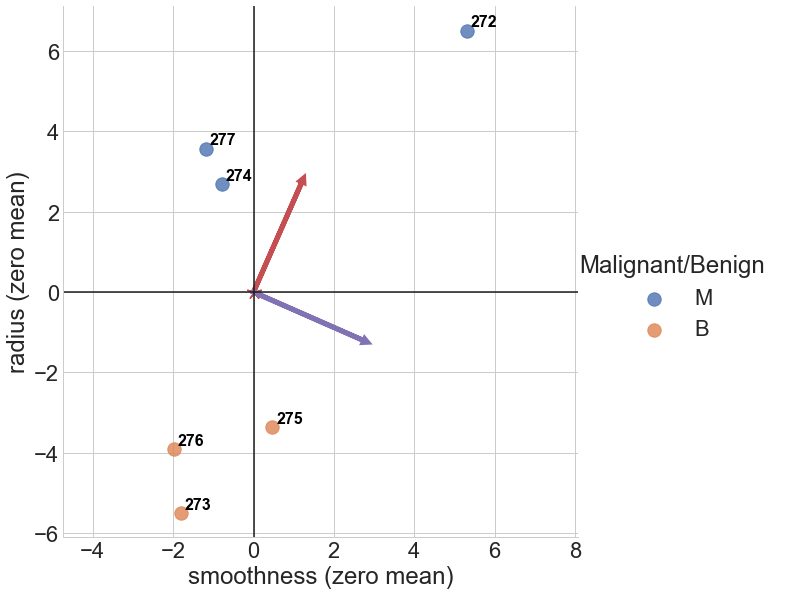

In [23]:
g1 = sns.lmplot('smoothness (zero mean)', 'radius (zero mean)', new_data, hue="Malignant/Benign", scatter_kws={"s": 180}, fit_reg=False, height=8)
ax = g1.axes[0,0]

for i in range(272,278):
    x = new_data['smoothness (zero mean)'][i] + 0.1
    y = new_data['radius (zero mean)'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)

ax.scatter(0,0,  s=200, c='r', marker=(5, 2))
ax.axis('equal')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

s = 3

x = pc1_vec[0]
y = pc1_vec[1]
ax.arrow(0,0,s*x,s*y,color='black',head_width=0.1, head_length=0.1, fc='r', ec='r', lw=5)

x = pc2_vec[0]
y = pc2_vec[1]
ax.arrow(0,0,s*x,s*y,color='black',head_width=0.1, head_length=0.1, fc='m', ec='m', lw=5)


### 6) Cumulative explained variance

In [24]:
variances

array([138.58990634,  18.20736249])

In [25]:
print(pc1_vec)
print(pc2_vec)

[0.40237101 0.91547669]
[ 0.91547669 -0.40237101]


In this example, the largest variance is 138.6 and the direction of this principal component is given by the vector `pc1_vec`.

The second largest variance is 18.2 and the direction of this principal component is given by the vector `pc2_vec`.

In a general problem, we would have many principal components. How can we easily visualize these components and decide how many we will keep in our reduced feature space? 

In [26]:
tot = sum(variances)
var_exp = [(i / tot)*100 for i in variances]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(var_exp)),var_exp, align='center', label='individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, 'r', where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')


In [27]:
Xstar=(A@Vt.T).values
new_data['pc1'] = Xstar[:,0]  
new_data['pc2'] = Xstar[:,1]  

In [28]:
g1 = sns.lmplot('pc1', 'pc2', new_data, hue="Malignant/Benign", fit_reg=False, height=8, scatter_kws={"s": 180})
ax = g1.axes[0,0]
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis('equal')


for i in range(272,278):
    x = new_data['pc1'][i] + 0.1
    y = new_data['pc2'][i] + 0.1
    ax.text(x,y,str(i),horizontalalignment='left',size='medium', color='black', weight='semibold', fontsize=16)


### 7) Complete dataset

But since we have only two features here, PCA is not really helping! Let's go back to original example:

In [29]:
tumor_data.head()

In [30]:
A_large = tumor_data.iloc[:,2:].values

type(A_large)

In [31]:
A_large.mean()

#### Center the mean

In [32]:
A_large.std(axis=0)

In [33]:
# X = (A_large - A_large.mean(axis=0))
# print(X.mean(axis=0))

X = (A_large - A_large.mean(axis=0))/A_large.std(axis=0)
print(X.std(axis=0))

In [34]:
u,s,vt = la.svd(X,full_matrices=False)

variances = s**2

tot = sum(variances)
var_exp = [(i / tot)*100 for i in variances]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(var_exp)),var_exp, align='center', label='individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, 'r', where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

In [35]:
cum_var_exp

#### Get the most important principal directions, and transform the original dataset

In [36]:
Vstar = vt[:3,:].T

In [37]:
Xstar=(X@Vstar) # change of basis

Xstar.shape

In [38]:
tumor_data_new = tumor_data.copy()

tumor_data_new['pc1'] = Xstar[:,0]  
tumor_data_new['pc2'] = Xstar[:,1]  
tumor_data_new['pc3'] = Xstar[:,2]  

In [39]:
g1 = sns.lmplot('pc1', 'pc2', tumor_data_new, hue="Malignant/Benign", fit_reg=False, height=8, scatter_kws={"s": 180})
ax = g1.axes[0,0]
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis('equal')


In [40]:
from mpl_toolkits.mplot3d import Axes3D

In [41]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(tumor_data_new['pc1'], tumor_data_new['pc2'], tumor_data_new['pc3'],c = tumor_data_new["Malignant/Benign"])

#### Plot the weight for each feature in the first principal component:

In [42]:
feature_names = tumor_data_new.columns[2:32]

In [43]:
V = vt.T



In [44]:
plt.figure(figsize=(14,6))
plt.bar(feature_names,V[:,0])
plt.xticks(rotation=90);
plt.title('importance of each attribute in ${\\bf p}_1$');

## Example 2: Food consumption in UK (using sklearn)

Example from:
http://setosa.io/ev/principal-component-analysis/

In [45]:
data = pd.io.parsers.read_csv("UK_foods.csv")
data

<img src="Picture1.png" width="500"/>

In [46]:
headers = data['Unnamed: 0'].values.tolist()
print(headers)

new_data = data.drop(['Unnamed: 0'], axis=1)
new_data.head()

regions = new_data.columns.values.tolist()
print(regions)

In [47]:
food = pd.DataFrame(new_data.values.T,columns=headers)
food['region'] = regions
food

In [48]:
food.std()

### This is when we want to try PCA!

In [49]:
#Performing PCA without scaling the data (to match the results from the website)
#X = pd.DataFrame(food[headers], columns=headers)
# In general, PCA scales the variables to zero-mean (use line below to scale)
X = pd.DataFrame(scale(food[headers]), columns=headers)

In [50]:
X.head()

In [51]:
pca = PCA().fit(X)
pca_samples = pca.transform(X)

In [52]:
var_exp = pca.explained_variance_ratio_
plt.bar(range(len(var_exp)),var_exp, align='center', label='individual explained variance');
plt.ylabel('Explained variance ratio');
plt.xlabel('Principal components');

In [53]:
components = pd.DataFrame(pca.components_, columns = headers) 

In [54]:
plt.figure()
plt.bar(headers,components.values[0])
plt.xticks(rotation=90)
plt.title('influence of original variables(food) upon pc1')
plt.figure()
plt.bar(headers,components.values[1])
plt.xticks(rotation=90)
plt.title('influence of original variables(food) upon pc2')

In [55]:
Xstar = pd.DataFrame(pca_samples,columns=['pc1','pc2','pc3','pc4'])
Xstar['region'] = regions
Xstar

In [56]:
sns.stripplot(x="pc1",y="region", data=Xstar, jitter=0.05, linewidth=1)

In [57]:
ax = plt.figure()
ax = sns.lmplot('pc1', 'pc2',Xstar,hue='region', fit_reg=False)
plt.axis('equal')
plt.xlabel('pc1')
plt.ylabel('pc2')